In [10]:
import os
import sys
print(os.path.abspath(''))

pkg_path = os.path.abspath('..')
print(pkg_path)
sys.path.insert(0, pkg_path)

import pyolin

from pyolin.gate import Gate

import matplotlib.pyplot as plot
import csv
import seaborn
import numpy

/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/notebooks
/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin


In [11]:
class ExperimentGate(Gate):
    
    def __init__(self, host, backbone, rbs, repressor, xs, ys):
        super().__init__(f"{rbs}_{repressor}", xs, ys)
        
        self.host = host
        self.backbone = backbone
        self.rbs = rbs
        self.repressor = repressor
        
    def __eq__(self, other):
        return (isinstance(other, ExperimentGate)
                and self.host == other.host
                and self.backbone == other.backbone
                and self.rbs == other.rbs
                and self.repressor == other.repressor)
    
    def __str__(self):
        return f"{self.name} in {self.host} with {self.backbone}"
    
    def __repr__(self):
        return self.__str__()
    
    
    @property
    def quickplot(self):
        figure = super().quickplot
        figure.axes[0].set_title(f"{self.name} with {self.backbone} in {self.host}")
        return figure
    
def parse_gate(filename):
    with open(filename) as file:
        xs = []
        ys = []
        for row in csv.reader(file):
            x = float(row[0])
            y = float(row[1])
            if x > 0.0 and y > 0.0:
                xs.append(x)
                ys.append(y)
            
        pieces = filename.split('_')
        
        return ExperimentGate(pieces[1], 
                              pieces[2], 
                              pieces[4].split('.')[0],
                              pieces[3],
                              xs,
                              ys)

In [12]:
from pyolin.ucf import UCF

cello_data = UCF("../ucf/Eco1C1G1T1.UCF.json");

There are 20 valid gates.
There are 158 compatible pairs


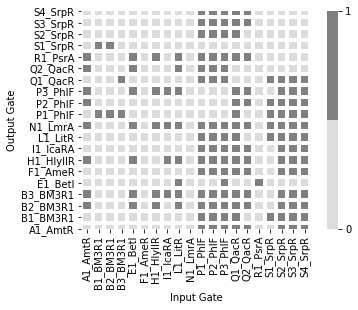

In [13]:
from pyolin.plotting import compatibility_heatmap
import numpy
import seaborn

cello_names = cello_data.names
cello_gates = [cello_data[name] for name in cello_names 
               if cello_data[name].has_valid_thresholds]

heatmap = compatibility_heatmap(cello_gates)

print(f"There are {len(cello_gates)} valid gates.")

compatible_count = 0
for a in cello_gates:
    for b in cello_gates:
        if a.is_compatible_with(b):
            compatible_count += 1
            
print(f"There are {compatible_count} compatible pairs")

cello_ils = [gate.il for gate in cello_gates]
cello_ihs = [gate.ih for gate in cello_gates]
cello_ols = [gate.ol for gate in cello_gates]
cello_ohs = [gate.oh for gate in cello_gates]

There are 89 valid gates.
There are 83 compatible combinations


/home/campus.ncl.ac.uk/b8051106/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


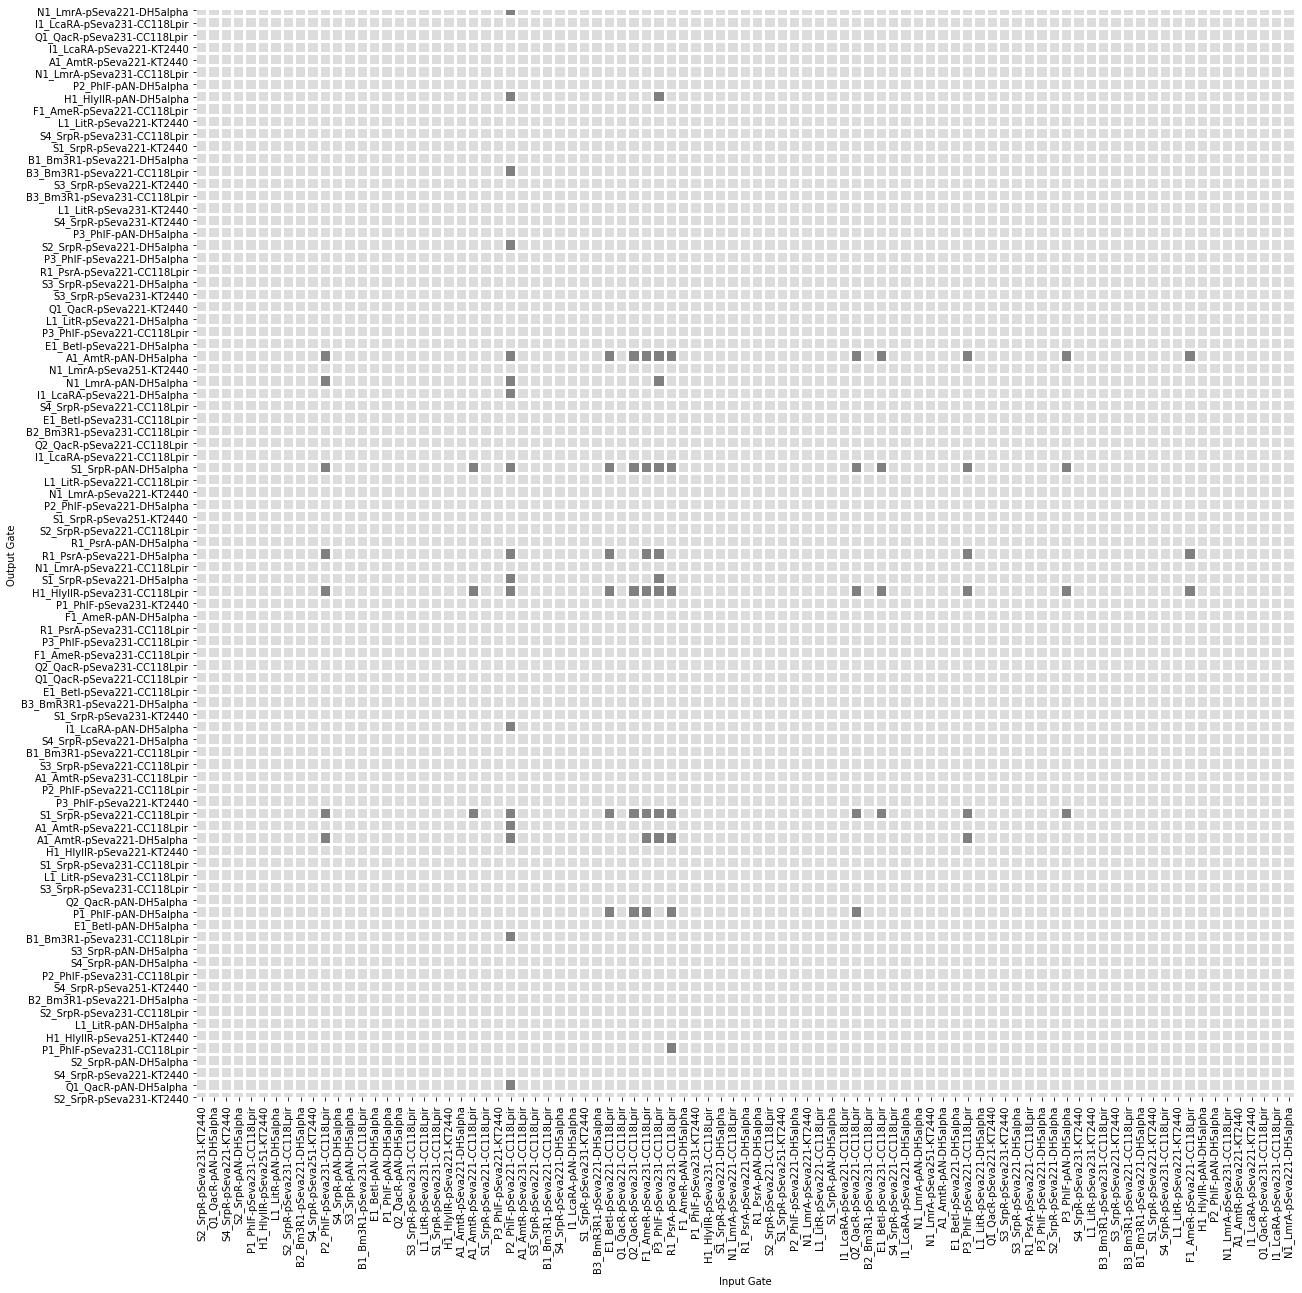

In [14]:
our_gates = [parse_gate('../data/experiment7/' + filename) for filename in os.listdir('../data/experiment7')]
our_gates = [gate for gate in our_gates if gate.has_valid_thresholds]

print(f"There are {len(our_gates)} valid gates.")

def compat_map(gates):
    num_gates = len(gates)
    compatibility = numpy.zeros((num_gates, num_gates), dtype=bool)
    for j in range(num_gates):
        a = gates[j]
        for i in range(num_gates):
            b = gates[i]
            compatibility[i,j] = a.is_compatible_with(b, offset=0.0)

    print(f"There are {numpy.count_nonzero(compatibility)} compatible combinations")

    figure, axes = plot.subplots(figsize=(20, 20))
    gate_names = [f"{g.name}-{g.backbone}-{g.host}" for g in gates]

    seaborn.heatmap(compatibility,
                    cmap=["gainsboro", "grey"],
                    linecolor="white",
                    linewidth=2,
                    xticklabels=gate_names,
                    yticklabels=gate_names,
                    cbar=False,
                    square=True,
                    ax=axes)
    axes.invert_yaxis()
    axes.set_xlabel("Input Gate")
    axes.set_ylabel("Output Gate")

    figure.show()
    
    return compatibility
    
compat_all_matrix = compat_map(our_gates)

In [23]:
def cello_analog(gate):
    return gate.host == 'DH5alpha' and gate.backbone == 'pAN'

our_ils = [gate.il for gate in our_gates if cello_analog(gate)]
our_ihs = [gate.ih for gate in our_gates if cello_analog(gate)]
our_ols = [gate.ol for gate in our_gates if cello_analog(gate)]
our_ohs = [gate.oh for gate in our_gates if cello_analog(gate)]

[0.07141803572545286, 0.04019020824560956, 0.15104861594466476, 0.2619432939757495, 0.41646314046801963, 0.09744192432163688, 0.1942583774666397, 0.10554149066675526, 0.05098306727226113, 0.19804897031139168, 0.030038585288738862, 0.13032721111010462, 0.23032330704210227, 0.05015520798431465, 0.21190396025772898, 0.1975568592985947, 0.010015964689980707, 0.04004404318791546, 0.06008184430990628, 0.10023917800929272]


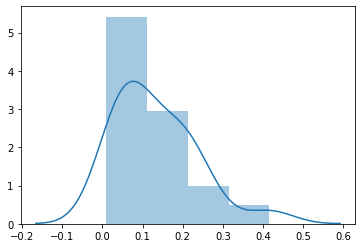

In [26]:
seaborn.distplot(cello_ils)
print(cello_ils)

[2.771700206381419, 5.244836302198317, 7.475676727326339, 10.631446492402524, 5.244836302198317, 10.306346855473137, 2.30873578359372, 4.950271017768591, 9.744064578534232, 35.465669274586915, 2.1422146279607697, 2.5498713810711937, 6.4875156985473055, 4.639081173469241, 4.902682995566846, 5.019578098179932, 8.742341418424166]


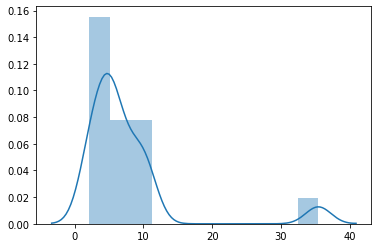

In [27]:
seaborn.distplot(our_ils)
print(our_ils)

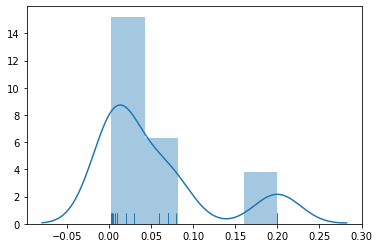

In [41]:
seaborn.distplot([gate.params["ymin"] for gate in cello_gates], rug=True)

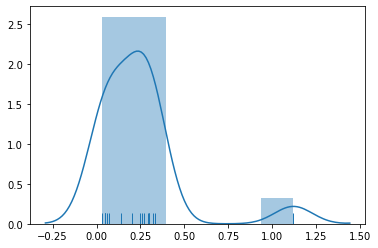

In [42]:
seaborn.distplot([gate.params["ymin"] for gate in our_gates if cello_analog(gate)], rug=True)

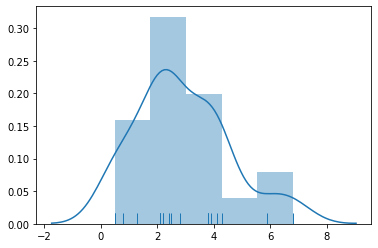

In [34]:
seaborn.distplot([gate.params["ymax"] for gate in cello_gates], rug=True)

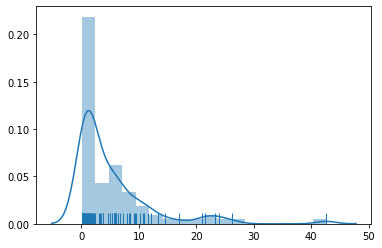

In [35]:
seaborn.distplot([gate.params["ymax"] for gate in our_gates if cello_analog(gate)], rug=True)

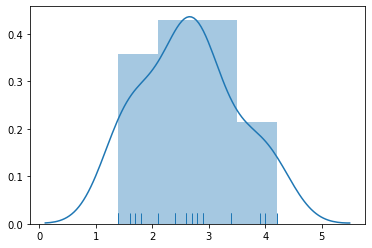

In [36]:
seaborn.distplot([gate.params["n"] for gate in cello_gates], rug=True)

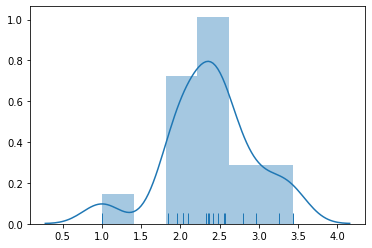

In [40]:
seaborn.distplot([gate.params["n"] for gate in our_gates if cello_analog(gate)], rug=True)

In [39]:
[gate.params["n"] for gate in our_gates if cello_analog(gate)]

[1.8376124954854962,
 2.0290760923773816,
 2.4161025418689928,
 2.484786045665409,
 2.0290760923773816,
 2.550717010421071,
 3.436637820153816,
 2.7989064186001054,
 2.331548251204292,
 1.9541193154682253,
 1.0000000000000056,
 3.259716238052115,
 2.099350750436951,
 2.5671924144300586,
 2.36736131056867,
 2.3561635494216997,
 2.9593292890525524]